In [1]:
%matplotlib inline
import matplotlib as mpl 
mpl.rcParams['figure.dpi'] = 100

from pandas import Grouper
from pandas import Series
from statsmodels.tsa.stattools import adfuller

from pandas import read_csv
from pandas import DataFrame
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMAResults
from math import sqrt
from matplotlib import pyplot

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

import numpy as np
import warnings

import pandas as pd
import datetime
import matplotlib.pyplot as plt

Dataset 1163, Validation 300
             Volume
count  1.464000e+03
mean   1.709827e+08
std    1.115626e+08
min    0.000000e+00
25%    1.005415e+08
50%    1.401272e+08
75%    2.016309e+08
max    9.598846e+08


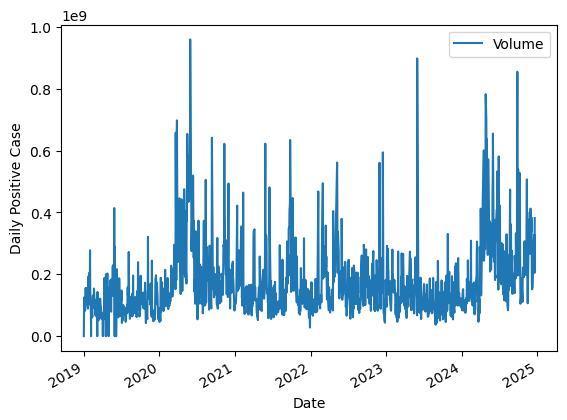

In [2]:
# separate out a validation dataset
from pandas import read_csv
series = read_csv('../../Dataset/BBRI_Volume.csv', header=0, index_col=0, parse_dates=True)
end = 1
# volume = series['Volume']

split_point = len(series) - (300 + end)
dataset, validation = series[0:split_point], series[split_point:-end]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

print(series.describe())
series.plot()
pyplot.ylabel("Daily Positive Case")
pyplot.show()

                  1
count  1.163000e+03
mean   1.593448e+08
std    1.026138e+08
min    0.000000e+00
25%    9.531406e+07
50%    1.335117e+08
75%    1.880128e+08
max    9.598846e+08


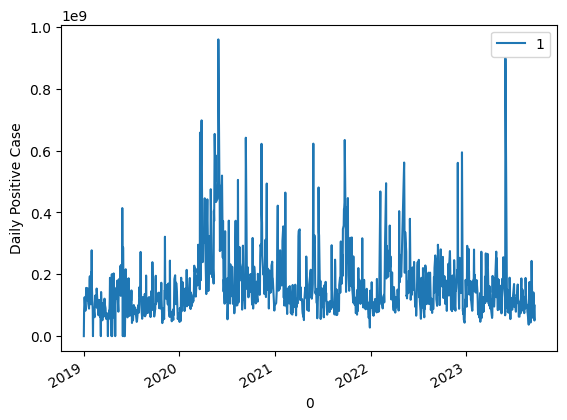

In [3]:
# line plots of time series
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True)
print(series.describe())
series.plot()
pyplot.ylabel("Daily Positive Case")
pyplot.show()

                  1
count  3.000000e+02
mean   2.153954e+08
std    1.316176e+08
min    4.578230e+07
25%    1.192911e+08
50%    1.823182e+08
75%    2.782183e+08
max    8.552668e+08


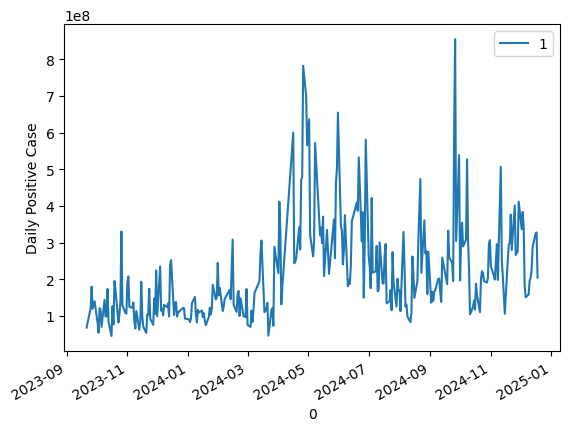

In [4]:
# line plots of time series
from pandas import read_csv
from matplotlib import pyplot
valid = read_csv('validation.csv', header=None, index_col=0, parse_dates=True)
print(valid.describe())
valid.plot()
pyplot.ylabel("Daily Positive Case")
pyplot.show()

C:\Users\akhda\AppData\Local\Temp\ipykernel_22064\2594613765.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  pyplot.subplot(212)


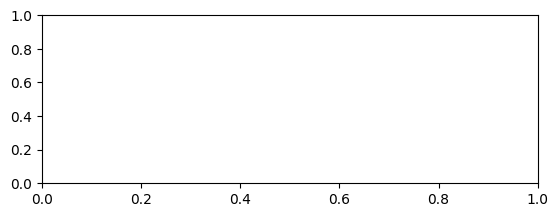

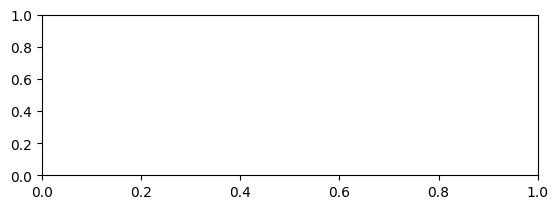

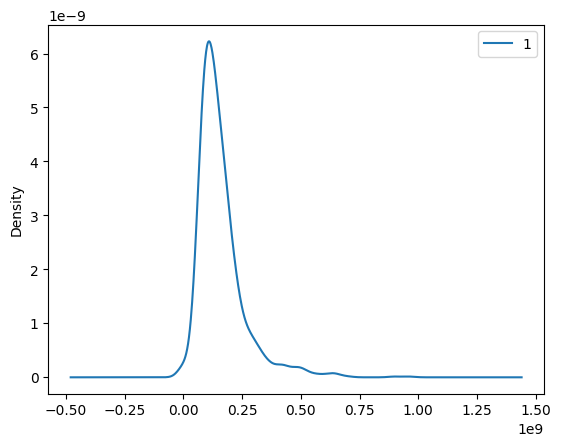

In [5]:
# density plots of time series
from pandas import read_csv
from matplotlib import pyplot
# series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
pyplot.figure(1)
pyplot.subplot(211)
series.hist()
pyplot.subplot(212)
series.plot(kind='kde')
pyplot.show()

In [6]:
# grid search ARIMA parameters for time series

# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    list_cfg = []
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                        list_cfg.append([best_cfg,best_score])
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    return list_cfg


In [7]:
# # grid search ARIMA parameters for time series
# # load dataset
# # series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# # evaluate parameters
# p_values = range(1, 5)
# d_values = [1]
# q_values = range(1, 5)
# warnings.filterwarnings("ignore")

# list_order = evaluate_models(series.values, p_values, d_values, q_values)

In [8]:
# evaluate persistence model on time series
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
# series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    yhat = history[-1]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
#     print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

RMSE: 94714511.024


In [9]:
# tentukan model
# print(list_order)
# ARIMA_order = list_order[-1][0]
# print(ARIMA_order)
ARIMA_order = (1, 1, 1)
# print(ARIMA_order)

In [10]:
# evaluate grid search configured ARIMA model

# load data
# series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=ARIMA_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
#     print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

RMSE: 80773123.390


                  0
count  5.820000e+02
mean  -3.462852e+05
std    8.084186e+07
min   -2.940079e+08
25%   -4.200082e+07
50%   -1.403950e+07
75%    2.768441e+07
max    7.809972e+08


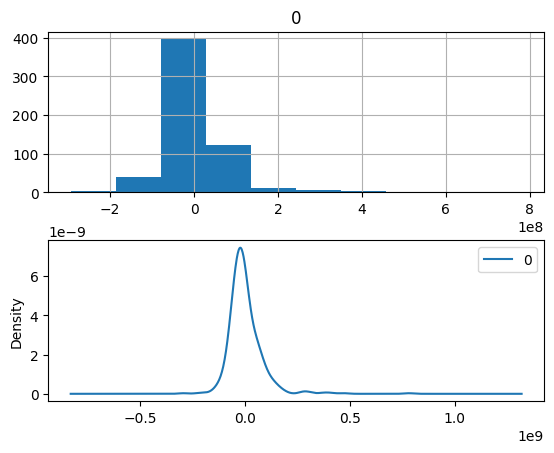

In [11]:
# summarize ARIMA forecast residuals

# load data
# series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=ARIMA_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    # errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())
pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

In [12]:
resi_bias = residuals.describe()[0][1]
print(residuals.describe()[0][1])

-346285.15625


RMSE: 80772381.102
                  0
count  5.820000e+02
mean  -1.649484e-01
std    8.084186e+07
min   -2.936616e+08
25%   -4.165454e+07
50%   -1.369321e+07
75%    2.803069e+07
max    7.813436e+08


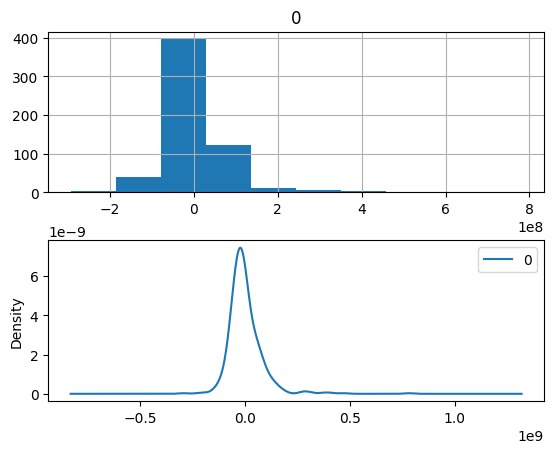

In [13]:
# plots of residual errors of bias corrected forecasts

# load data
# series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
bias = resi_bias
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=ARIMA_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    yhat = bias + yhat
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())
pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

RMSE: 80772381.102
                  0
count  5.820000e+02
mean  -1.649484e-01
std    8.084186e+07
min   -2.936616e+08
25%   -4.165454e+07
50%   -1.369321e+07
75%    2.803069e+07
max    7.813436e+08


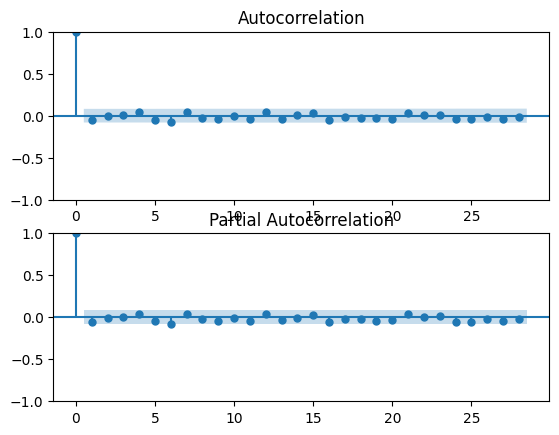

In [14]:
# ACF and PACF plots of residual errors of bias corrected forecasts

# load data
# series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
bias = resi_bias
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=ARIMA_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    yhat = bias + yhat
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
pyplot.figure()
pyplot.subplot(211)
plot_acf(residuals, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(residuals, ax=pyplot.gca(),method='ywm')
pyplot.show()

In [15]:
# save finalized model

# load data
# series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
# fit model
model = ARIMA(X, order=ARIMA_order)
model_fit = model.fit()
# bias constant, could be calculated from in-sample mean residual
bias = resi_bias
# save model
model_fit.save('model.pkl')
np.save('model_bias.npy', [bias])

# load finalized model and make a prediction

In [16]:
# load finalized model and make a prediction

# series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
model_fit = ARIMAResults.load('model.pkl')
bias = np.load('model_bias.npy')
yhat = float(model_fit.forecast()[0])
yhat = bias + yhat
print('Predicted: %.3f' % yhat)

Predicted: 97170634.634


# try on evaluation data

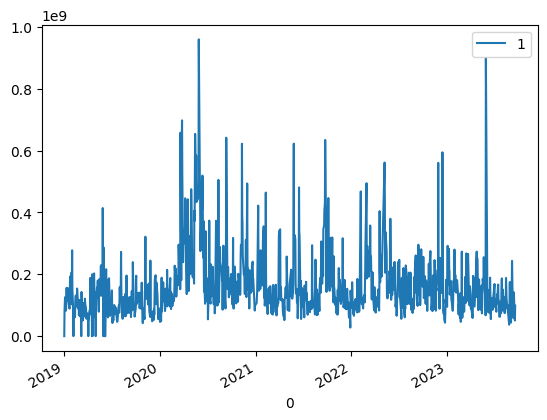

,1
0,
2019-01-01,0
2019-01-02,82441033
2019-01-03,102805905
2019-01-04,125907734
2019-01-07,82106628
...,...
2023-09-14,76831700
2023-09-15,141455400
2023-09-18,61329000


In [17]:
series.plot()
pyplot.show()
series

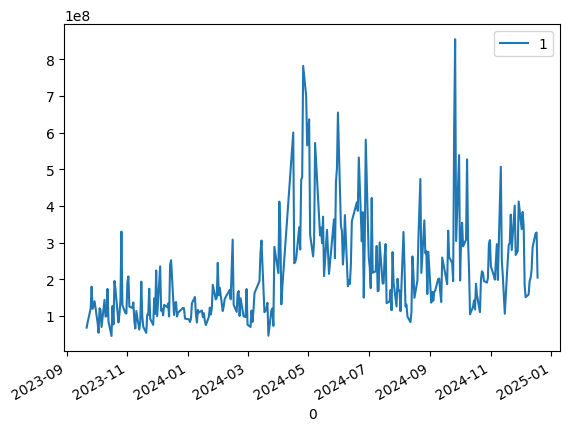

,1
0,
2023-09-21,68584900
2023-09-22,83184100
2023-09-25,120196700
2023-09-26,180280600
2023-09-27,119774700
...,...
2024-12-12,226698900
2024-12-13,287838100
2024-12-16,325441900


In [18]:
# validation = read_csv('validation.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
validation = read_csv('validation.csv', header=None, index_col=0, parse_dates=True)
validation.squeeze('columns') 
validation.plot()
pyplot.show()
validation

>Predicted=97170634.634, Expected=68584896.000
>Predicted=84621354.241, Expected=83184096.000
>Predicted=88664886.605, Expected=120196704.000
>Predicted=103522656.307, Expected=180280608.000
>Predicted=130989509.546, Expected=119774704.000
>Predicted=111741190.427, Expected=140331104.000
>Predicted=121400092.434, Expected=81674600.000
>Predicted=99045701.003, Expected=54462700.000
>Predicted=85282293.490, Expected=121445000.000
>Predicted=109542320.000, Expected=116814800.000
>Predicted=109071509.185, Expected=70202304.000
>Predicted=90369005.676, Expected=144476992.000
>Predicted=119039407.820, Expected=98457000.000
>Predicted=102869956.101, Expected=100394800.000
>Predicted=103075547.339, Expected=174022400.000
>Predicted=133695264.640, Expected=84648800.000
>Predicted=101202138.663, Expected=45782300.000
>Predicted=82658549.622, Expected=127287200.000
>Predicted=112188471.008, Expected=77217600.000
>Predicted=93024797.700, Expected=195831392.000
>Predicted=140790700.433, Expected=17

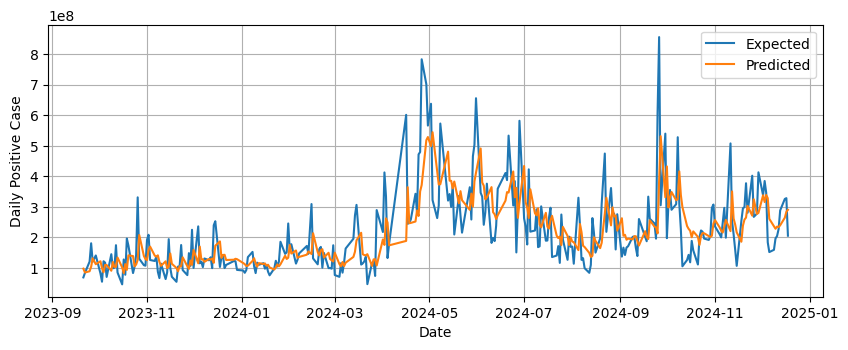

In [19]:
# load and evaluate the finalized model on the validation dataset

# load and prepare datasets
# dataset = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
X = series.values.astype('float32')
history = [x for x in X]
# validation = read_csv('validation.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
validation = read_csv('validation.csv', header=None, index_col=0, parse_dates=True)
y = validation.values.astype('float32')
# load model
model_fit = ARIMAResults.load('model.pkl')
bias = np.load('model_bias.npy')
# make first prediction
predictions = list()
yhat = float(model_fit.forecast()[0])
yhat = bias + yhat
predictions.append(yhat)
history.append(y[0])
print('>Predicted=%.3f, Expected=%.3f' % (yhat, y[0]))
# rolling forecasts
for i in range(1, len(y)):
    # difference data
    # predict
    model = ARIMA(history, order=ARIMA_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    yhat = bias + yhat
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(y, predictions))
mae = mean_absolute_error(y, predictions)
mape = mean_absolute_percentage_error(y, predictions) *100
print('RMSE: %.3f' % rmse)
print('MAE: %.3f' % mae)
print('MAPE: %.3f' % mape)

predictions_flat = np.array(predictions).reshape(-1)
result = pd.DataFrame(np.array([y[:,0],predictions_flat]).T)
val_date = validation.reset_index().iloc[:,[0]].rename(columns={0: "date"})
result_date = pd.concat([val_date, result],axis=1).set_index('date')
plt.style.use('default')
fig = plt.figure(figsize=(10, 4))
ax0 = fig.add_subplot(111)
ax0.plot(result_date)
ax0.grid()
fig.autofmt_xdate(rotation=0, ha='center')
ax0.set_xlabel('Date')
ax0.set_ylabel('Daily Positive Case')
ax0.legend(['Expected', 'Predicted'])
plt.show()

In [20]:
validation

,1
0,
2023-09-21,68584900
2023-09-22,83184100
2023-09-25,120196700
2023-09-26,180280600
2023-09-27,119774700
...,...
2024-12-12,226698900
2024-12-13,287838100
2024-12-16,325441900


In [21]:
y[:,0].shape

(300,)

In [22]:
predictions_flat.shape

(300,)

>Predicted=98710096.000, Expected=68584896
>Predicted=68584896.000, Expected=83184096
>Predicted=83184096.000, Expected=120196704
>Predicted=120196704.000, Expected=180280608
>Predicted=180280608.000, Expected=119774704
>Predicted=119774704.000, Expected=140331104
>Predicted=140331104.000, Expected=81674600
>Predicted=81674600.000, Expected=54462700
>Predicted=54462700.000, Expected=121445000
>Predicted=121445000.000, Expected=116814800
>Predicted=116814800.000, Expected=70202304
>Predicted=70202304.000, Expected=144476992
>Predicted=144476992.000, Expected=98457000
>Predicted=98457000.000, Expected=100394800
>Predicted=100394800.000, Expected=174022400
>Predicted=174022400.000, Expected=84648800
>Predicted=84648800.000, Expected=45782300
>Predicted=45782300.000, Expected=127287200
>Predicted=127287200.000, Expected=77217600
>Predicted=77217600.000, Expected=195831392
>Predicted=195831392.000, Expected=173353600
>Predicted=173353600.000, Expected=82756096
>Predicted=82756096.000, Expec

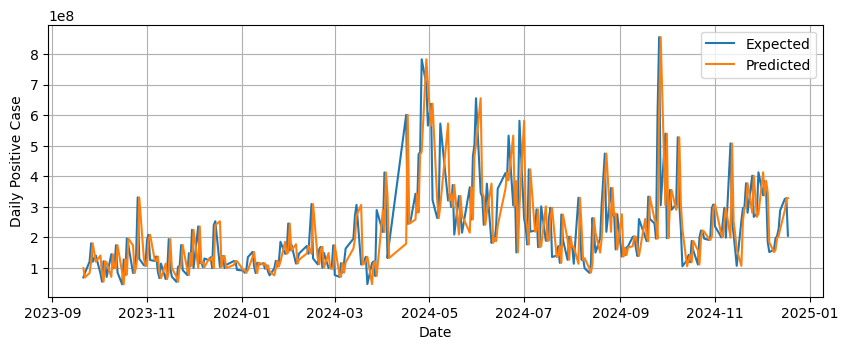

In [23]:
# evaluate persistence model on time series
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# prepare data
train = X

# load and prepare datasets
y = validation.values.astype('float32') # ambil dari cell sebelumnya no 15

# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(y)):
    # predict
    yhat = history[-1]
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))

# report performance
rmse = sqrt(mean_squared_error(y, predictions))
mae = mean_absolute_error(y, predictions)
mape = mean_absolute_percentage_error(y, predictions)*100
print('RMSE: %.3f' % rmse)
print('MAE: %.3f' % mae)
print('MAPE: %.3f' % mape)

predictions_flat = np.array(predictions).reshape(-1)
result = pd.DataFrame(np.array([y[:,0],predictions_flat]).T)
val_date = validation.reset_index().iloc[:,[0]].rename(columns={0: "date"})
result_date = pd.concat([val_date, result],axis=1).set_index('date')
plt.style.use('default')
fig = plt.figure(figsize=(10, 4))
ax0 = fig.add_subplot(111)
ax0.plot(result_date)
ax0.grid()
fig.autofmt_xdate(rotation=0, ha='center')
ax0.set_xlabel('Date')
ax0.set_ylabel('Daily Positive Case')
ax0.legend(['Expected', 'Predicted'])
plt.show()

# try on test data

                  0
count  7.320000e+02
mean   9.335661e+05
std    8.771448e+07
min   -2.940079e+08
25%   -4.402305e+07
50%   -1.162672e+07
75%    3.110697e+07
max    7.809972e+08


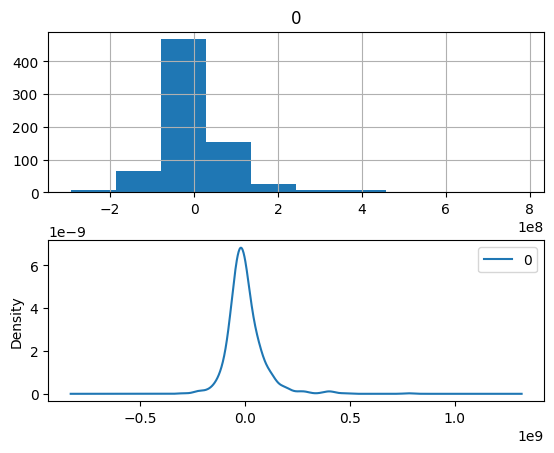

933566.0625


In [24]:
# find new residual on new training data

# load data
series = read_csv('../../Dataset/BBRI_Volume.csv', header=0, index_col=0, parse_dates=True)
end = 1
# volume = series['Volume']

split_point = len(series) - end
dataset, validation = series[0:split_point], series[split_point:]
X = dataset.values.astype('float32')
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=ARIMA_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    # errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())
pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

resi_bias = residuals.describe()[0][1]
print(residuals.describe()[0][1])

In [25]:
# save finalized model

# load data
series = read_csv('../../Dataset/BBRI_Volume.csv', header=0, index_col=0, parse_dates=True)
end = 300 # sesuaikan dengan split point di awal code
# volume = series['Volume']

split_point = len(series) - end
dataset, validation = series[0:split_point], series[split_point:]
X = dataset.values.astype('float32')
history = [x for x in X]

# difference data
# fit model
model = ARIMA(history, order=ARIMA_order)
model_fit = model.fit()
# bias constant, could be calculated from in-sample mean residual
bias = resi_bias
# save model
model_fit.save('model.pkl')
np.save('model_bias.npy', [bias])

>Predicted=85901205.460, Expected=83184096.000
>Predicted=89944737.824, Expected=120196704.000
>Predicted=104802507.526, Expected=180280608.000
>Predicted=132269360.765, Expected=119774704.000
>Predicted=113021041.646, Expected=140331104.000
>Predicted=122679943.652, Expected=81674600.000
>Predicted=100325552.222, Expected=54462700.000
>Predicted=86562144.708, Expected=121445000.000
>Predicted=110822171.219, Expected=116814800.000
>Predicted=110351360.404, Expected=70202304.000
>Predicted=91648856.894, Expected=144476992.000
>Predicted=120319259.039, Expected=98457000.000
>Predicted=104149807.320, Expected=100394800.000
>Predicted=104355398.558, Expected=174022400.000
>Predicted=134975115.859, Expected=84648800.000
>Predicted=102481989.881, Expected=45782300.000
>Predicted=83938400.840, Expected=127287200.000
>Predicted=113468322.227, Expected=77217600.000
>Predicted=94304648.919, Expected=195831392.000
>Predicted=142070551.651, Expected=173353600.000
>Predicted=139668732.511, Expected

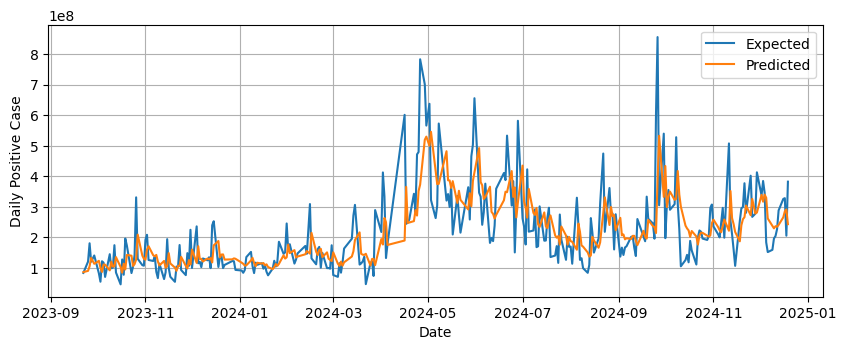

In [26]:
# load and evaluate the finalized model on the validation dataset

# load and prepare datasets
y = validation.values.astype('float32') # ambil dari cell sebelumnya no 15

# load model
model_fit = ARIMAResults.load('model.pkl')
bias = np.load('model_bias.npy')
# make first prediction
predictions = list()
yhat = float(model_fit.forecast()[0])
yhat = bias + yhat
predictions.append(yhat)
history.append(y[0])
print('>Predicted=%.3f, Expected=%.3f' % (yhat, y[0]))
# rolling forecasts
for i in range(1, len(y)):
    # predict
    model = ARIMA(history, order=ARIMA_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    yhat = bias + yhat
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(y, predictions))
mae = mean_absolute_error(y, predictions)
mape = mean_absolute_percentage_error(y, predictions)*100 
print('RMSE: %.3f' % rmse)
print('MAE: %.3f' % mae)
print('MAPE: %.3f' % mape)

predictions_flat = np.array(predictions).reshape(-1)
y_reshaped = y.reshape(-1, 1)  # Reshape to a 2D array with one column
result = pd.DataFrame(np.array([y_reshaped.flatten(), predictions_flat]).T)
# result = pd.DataFrame(np.array([y[:,0],predictions_flat]).T)
val_date = validation.reset_index().iloc[:,[0]].rename(columns={0: 'Date'})
result_date = pd.concat([val_date, result],axis=1).set_index('Date')
plt.style.use('default')
fig = plt.figure(figsize=(10, 4))
ax0 = fig.add_subplot(111)
ax0.plot(result_date)
ax0.grid()
fig.autofmt_xdate(rotation=0, ha='center')
ax0.set_xlabel('Date')
ax0.set_ylabel('Daily Positive Case')
ax0.legend(['Expected', 'Predicted'])
plt.show()

>Predicted=68584896.000, Expected=83184096
>Predicted=83184096.000, Expected=120196704
>Predicted=120196704.000, Expected=180280608
>Predicted=180280608.000, Expected=119774704
>Predicted=119774704.000, Expected=140331104
>Predicted=140331104.000, Expected=81674600
>Predicted=81674600.000, Expected=54462700
>Predicted=54462700.000, Expected=121445000
>Predicted=121445000.000, Expected=116814800
>Predicted=116814800.000, Expected=70202304
>Predicted=70202304.000, Expected=144476992
>Predicted=144476992.000, Expected=98457000
>Predicted=98457000.000, Expected=100394800
>Predicted=100394800.000, Expected=174022400
>Predicted=174022400.000, Expected=84648800
>Predicted=84648800.000, Expected=45782300
>Predicted=45782300.000, Expected=127287200
>Predicted=127287200.000, Expected=77217600
>Predicted=77217600.000, Expected=195831392
>Predicted=195831392.000, Expected=173353600
>Predicted=173353600.000, Expected=82756096
>Predicted=82756096.000, Expected=104021504
>Predicted=104021504.000, Exp

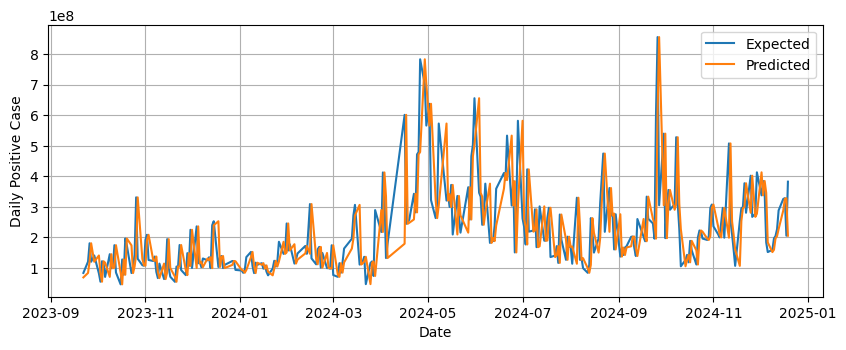

In [27]:
# evaluate persistence model on time series
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# prepare data
train = X

# load and prepare datasets
y = validation.values.astype('float32') # ambil dari cell sebelumnya no 15

# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(y)):
    # predict
    yhat = history[-1]
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))

# report performance
rmse = sqrt(mean_squared_error(y, predictions))
mae = mean_absolute_error(y, predictions)
mape = mean_absolute_percentage_error(y, predictions)*100
print('RMSE: %.3f' % rmse)
print('MAE: %.3f' % mae)
print('MAPE: %.3f' % mape)

predictions_flat = np.array(predictions).reshape(-1)
y_reshaped = y.reshape(-1, 1)  # Reshape to a 2D array with one column
result = pd.DataFrame(np.array([y_reshaped.flatten(), predictions_flat]).T)
# result = pd.DataFrame(np.array([y[:,0],predictions_flat]).T)
val_date = validation.reset_index().iloc[:,[0]].rename(columns={0: "Date"})
result_date = pd.concat([val_date, result],axis=1).set_index('Date')
plt.style.use('default')
fig = plt.figure(figsize=(10, 4))
ax0 = fig.add_subplot(111)
ax0.plot(result_date)
ax0.grid()
fig.autofmt_xdate(rotation=0, ha='center')
ax0.set_xlabel('Date')
ax0.set_ylabel('Daily Positive Case')
ax0.legend(['Expected', 'Predicted'])
plt.show()